In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/data-laboratory/final_merged_df.csv
/kaggle/input/data-laboratory/__results__.html
/kaggle/input/data-laboratory/__notebook__.ipynb
/kaggle/input/data-laboratory/__output__.json
/kaggle/input/data-laboratory/custom.css


In [2]:
df = pd.read_csv("/kaggle/input/data-laboratory/final_merged_df.csv")

In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
df

,index_x,created_at,username,tcode,num_retweets,type,following,followers,sts_cnt,loc,lst_cnt,content,lang,reply_tokens,mentions,hashtags,index_y,predicted_candidate_mentions,predicted_sentiment,predicted_topic
0,0,2024-01-04T09:57:09Z,@QOS7XYPBfXZWFeLSmdLEt8njUMwwr2Fpel3Cqvh2gW4=,rt,1248,twit,266,107,9687,Unknown Location,0,K-Popers Berencana Kirim Food Truck untuk Anie...,id,[re tempodotco],NaN,['TempoSeleb'],274070.0,[1],2.0,8.0
1,1,2024-01-04T09:57:09Z,@lSDenDKpcZVnv9txjBcg5qaqxYgVAq/3gTvA8yxPuL4=,rt,195,twit,564,303,12461,Indonesia,2,Bapak Pendeta Yusak ini Dari Magetan ke Ponoro...,id,[re yurissa_samosir],NaN,[],771311.0,[1],2.0,6.0
2,2,2024-01-04T09:57:10Z,@Ykjdr3xs5+WfH9zBQMoAx5fdTeAwmRRm28PFVw5JeJE=,rt,116,twit,376,156,7488,Indonesia,1,"Viral , Gimana Mak Mak di jakarta tidak ter An...",id,[re stresnowati1],NaN,[],1491176.0,[1],2.0,7.0
3,3,2024-01-04T09:57:10Z,@KQ/OmqgBG/U/OVkvpqAQYYiAThFGxQBtg3J5Vjp4Glk=,rt,2264,twit,163,203,2065,Unknown Location,0,"Mendengar Pak Anies disini, rasanya saya sudah...",id,[re tomlembong],NaN,[],1652217.0,[1],2.0,6.0
4,4,2024-01-04T09:57:11Z,@yqECLRUCZgqx8VzEUl430Wj6mfh2SgDYzKwala0bT5o=,rt,1157,twit,1,1,798,Unknown Location,0,Media Asing Soroti Cara Anies Gaet Pemilih Mud...,id,[re cnnindonesia],NaN,[],422089.0,[1],2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9817350,9817350,2024-01-06T11:18:04Z,@TwCvtXMk0shToRwnuGzJqqc7CnNfKu5Sy2KGxobvrzE=,rt,1496,twit,139,30,1308,Unknown Location,0,di Cegat Oleh Anak -Anak Milenial dan Anak-Ana...,id,[re yurissa_samosir],NaN,[],707652.0,[1],2.0,8.0
9817351,9817351,2024-01-06T11:18:04Z,@pEX2KVZs+Vknz0IAD1nLk9XL7f+4tUbLI7k5MkUvZz8=,rt,4,twit,473,237,21617,Unknown Location,0,"APK dari Pusat Tiba, ANIes Kota Solo Bergerak ...",id,[re kba_news],NaN,[],346069.0,[1],2.0,7.0
9817352,9817352,2024-01-06T11:18:05Z,@KhXOHuWg3rF+tH/IvnVdIKE6gkQoU5+CqePqmIFFrQg=,rt,151,twit,143,56,2932,Unknown Location,0,Tetap semangat pak tetap semangat pak Tetap ...,id,[re theladyjoker],"@kYo4g8BWrOVt8nzENmM18FfwvHQbjIHpX/KRpXDcsFk=,...","['GanjarMahfud2024', 'GanjarMahfudM3nang']",1767239.0,[3],2.0,0.0
9817353,9817353,2024-01-06T11:18:06Z,@aAJ+fus0G60OSVYs5r2RVSwp90Lb7qwwNnUQmiE0cIY=,rt,996,twit,337,208,26490,Unknown Location,0,Saya mau cari hadiah untuk mas Anies topi sama...,id,[re cakiminow],NaN,['AMINajaDulu'],588552.0,[1],2.0,7.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9817355 entries, 0 to 9817354
Data columns (total 20 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   index_x                       int64  
 1   created_at                    object 
 2   username                      object 
 3   tcode                         object 
 4   num_retweets                  int64  
 5   type                          object 
 6   following                     int64  
 7   followers                     int64  
 8   sts_cnt                       int64  
 9   loc                           object 
 10  lst_cnt                       int64  
 11  content                       object 
 12  lang                          object 
 13  reply_tokens                  object 
 14  mentions                      object 
 15  hashtags                      object 
 16  index_y                       float64
 17  predicted_candidate_mentions  object 
 18  predicted_sentiment   

In [7]:
import ast
def normalize_mentions(mentions):
    try:
        mentions_list = ast.literal_eval(mentions)
        if mentions_list == [4]:
            return [0, 0, 0, 0]
        mentions_list = [m for m in mentions_list if m != 4]
        encoded_vector = [0] * 4
        for candidate_id in mentions_list:
            if candidate_id < 4:  # Ensure candidate_id is within range
                encoded_vector[candidate_id] = 1
        return encoded_vector
    except (SyntaxError, ValueError):
        return [0, 0, 0, 0]  # Return default value if parsing fails

# Apply normalization function to predicted_candidate_mentions
candidate_mentions = df['predicted_candidate_mentions'].apply(normalize_mentions).tolist()

# Create new columns in DataFrame
df[['None', 'Candidate 1', 'Candidate 2', 'Candidate 3']] = pd.DataFrame(candidate_mentions, index=df.index)

In [8]:
can=df["predicted_candidate_mentions"].value_counts()
print(can)

predicted_candidate_mentions
[1]          3890866
[2]          2614749
[3]          2252547
[1, 2]        336159
[0]           300320
[1, 2, 3]     160454
[1, 3]        133459
[2, 3]        127898
Name: count, dtype: int64


In [12]:
df

,index_x,created_at,username,tcode,num_retweets,type,following,followers,sts_cnt,loc,...,mentions,hashtags,index_y,predicted_candidate_mentions,predicted_sentiment,predicted_topic,None,Candidate 1,Candidate 2,Candidate 3
0,0,2024-01-04T09:57:09Z,@QOS7XYPBfXZWFeLSmdLEt8njUMwwr2Fpel3Cqvh2gW4=,rt,1248,twit,266,107,9687,Unknown Location,...,NaN,['TempoSeleb'],274070.0,[1],2.0,8.0,0,1,0,0
1,1,2024-01-04T09:57:09Z,@lSDenDKpcZVnv9txjBcg5qaqxYgVAq/3gTvA8yxPuL4=,rt,195,twit,564,303,12461,Indonesia,...,NaN,[],771311.0,[1],2.0,6.0,0,1,0,0
2,2,2024-01-04T09:57:10Z,@Ykjdr3xs5+WfH9zBQMoAx5fdTeAwmRRm28PFVw5JeJE=,rt,116,twit,376,156,7488,Indonesia,...,NaN,[],1491176.0,[1],2.0,7.0,0,1,0,0
3,3,2024-01-04T09:57:10Z,@KQ/OmqgBG/U/OVkvpqAQYYiAThFGxQBtg3J5Vjp4Glk=,rt,2264,twit,163,203,2065,Unknown Location,...,NaN,[],1652217.0,[1],2.0,6.0,0,1,0,0
4,4,2024-01-04T09:57:11Z,@yqECLRUCZgqx8VzEUl430Wj6mfh2SgDYzKwala0bT5o=,rt,1157,twit,1,1,798,Unknown Location,...,NaN,[],422089.0,[1],2.0,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9817350,9817350,2024-01-06T11:18:04Z,@TwCvtXMk0shToRwnuGzJqqc7CnNfKu5Sy2KGxobvrzE=,rt,1496,twit,139,30,1308,Unknown Location,...,NaN,[],707652.0,[1],2.0,8.0,0,1,0,0
9817351,9817351,2024-01-06T11:18:04Z,@pEX2KVZs+Vknz0IAD1nLk9XL7f+4tUbLI7k5MkUvZz8=,rt,4,twit,473,237,21617,Unknown Location,...,NaN,[],346069.0,[1],2.0,7.0,0,1,0,0
9817352,9817352,2024-01-06T11:18:05Z,@KhXOHuWg3rF+tH/IvnVdIKE6gkQoU5+CqePqmIFFrQg=,rt,151,twit,143,56,2932,Unknown Location,...,"@kYo4g8BWrOVt8nzENmM18FfwvHQbjIHpX/KRpXDcsFk=,...","['GanjarMahfud2024', 'GanjarMahfudM3nang']",1767239.0,[3],2.0,0.0,0,0,0,1
9817353,9817353,2024-01-06T11:18:06Z,@aAJ+fus0G60OSVYs5r2RVSwp90Lb7qwwNnUQmiE0cIY=,rt,996,twit,337,208,26490,Unknown Location,...,NaN,['AMINajaDulu'],588552.0,[1],2.0,7.0,0,1,0,0


# Topic Trend

/tmp/ipykernel_33/1300068123.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['predicted_topic'].fillna('Unknown', inplace=True)


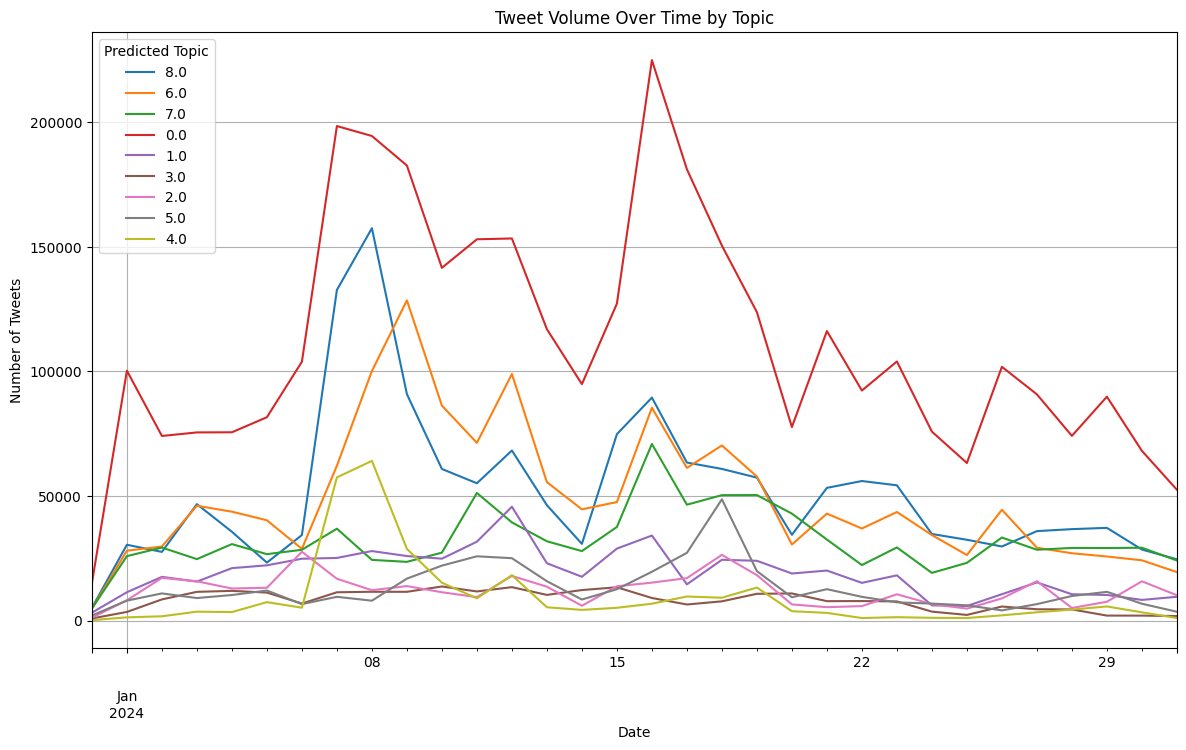

In [15]:
import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame with tweet data
df['created_at'] = pd.to_datetime(df['created_at'])

# Replace NaN values in 'predicted_topic' with a placeholder (if needed)
df['predicted_topic'].fillna('Unknown', inplace=True)

# Resample tweets by day for each topic
topics = df['predicted_topic'].unique()

plt.figure(figsize=(14, 8))

# Plot each topic separately
for topic in topics:
    if topic == 'Unknown':
        continue  # Skip 'Unknown' topics if present

    # Filter tweets for the current topic
    topic_tweets = df[df['predicted_topic'] == topic]

    # Resample by day and count tweets
    daily_tweets = topic_tweets.resample('D', on='created_at').size()

    # Plotting tweet trends for each topic
    daily_tweets.plot(label=topic)

plt.title('Tweet Volume Over Time by Topic')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend(title='Predicted Topic', loc='upper left')
plt.grid(True)
plt.show()


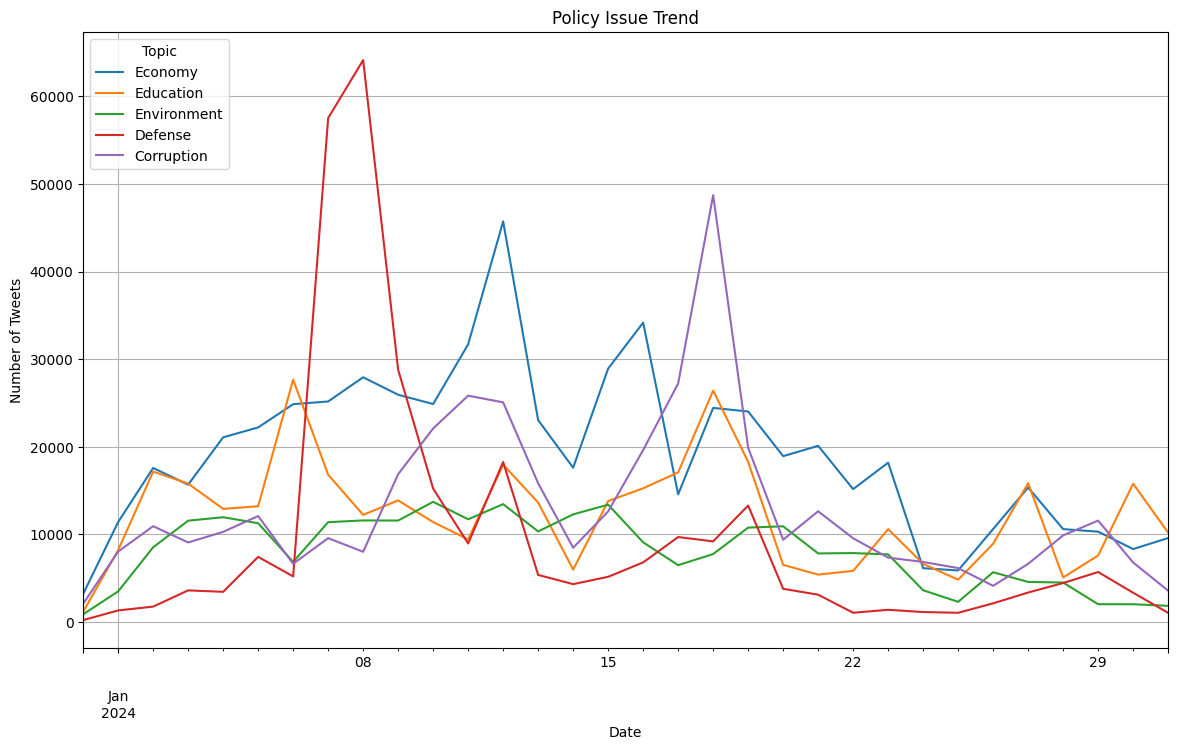

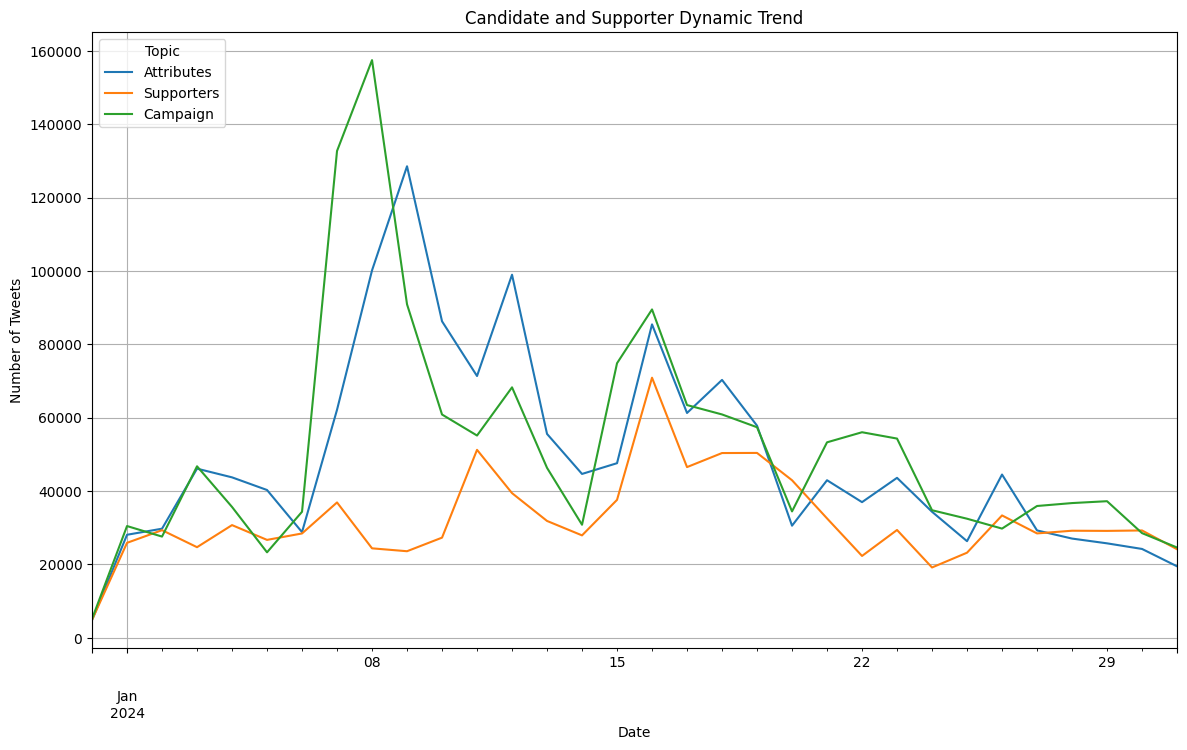

In [31]:
# Define topic groups
policy_issues = [1, 2, 3, 4, 5]
candidate_supporter_dynamics = [6, 7, 8]

# Create a mapping for short topic names
topic_names = {
    1: 'Economy',
    2: 'Education',
    3: 'Environment',
    4: 'Defense',
    5: 'Corruption',
    6: 'Attributes',
    7: 'Supporters',
    8: 'Campaign'
}

# Filter topics
policy_topics = df[df['predicted_topic'].isin(policy_issues)]
candidate_supporter_topics = df[df['predicted_topic'].isin(candidate_supporter_dynamics)]

# Function to plot trends
def plot_trends(data, topics, title):
    plt.figure(figsize=(14, 8))
    for topic in topics:
        topic_name = topic_names[topic]
        # Filter tweets for the current topic
        topic_tweets = data[data['predicted_topic'] == topic]
        # Resample by day and count tweets
        daily_tweets = topic_tweets.resample('D', on='created_at').size()
        # Plotting tweet trends for each topic
        daily_tweets.plot(label=topic_name)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Number of Tweets')
    plt.legend(title='Topic', loc='upper left')
    plt.grid(True)
    plt.show()

# Plot policy issue trends
plot_trends(policy_topics, policy_issues, 'Policy Issue Trend')

# Plot candidate and supporter dynamic trends
plot_trends(candidate_supporter_topics, candidate_supporter_dynamics, 'Candidate and Supporter Dynamic Trend')

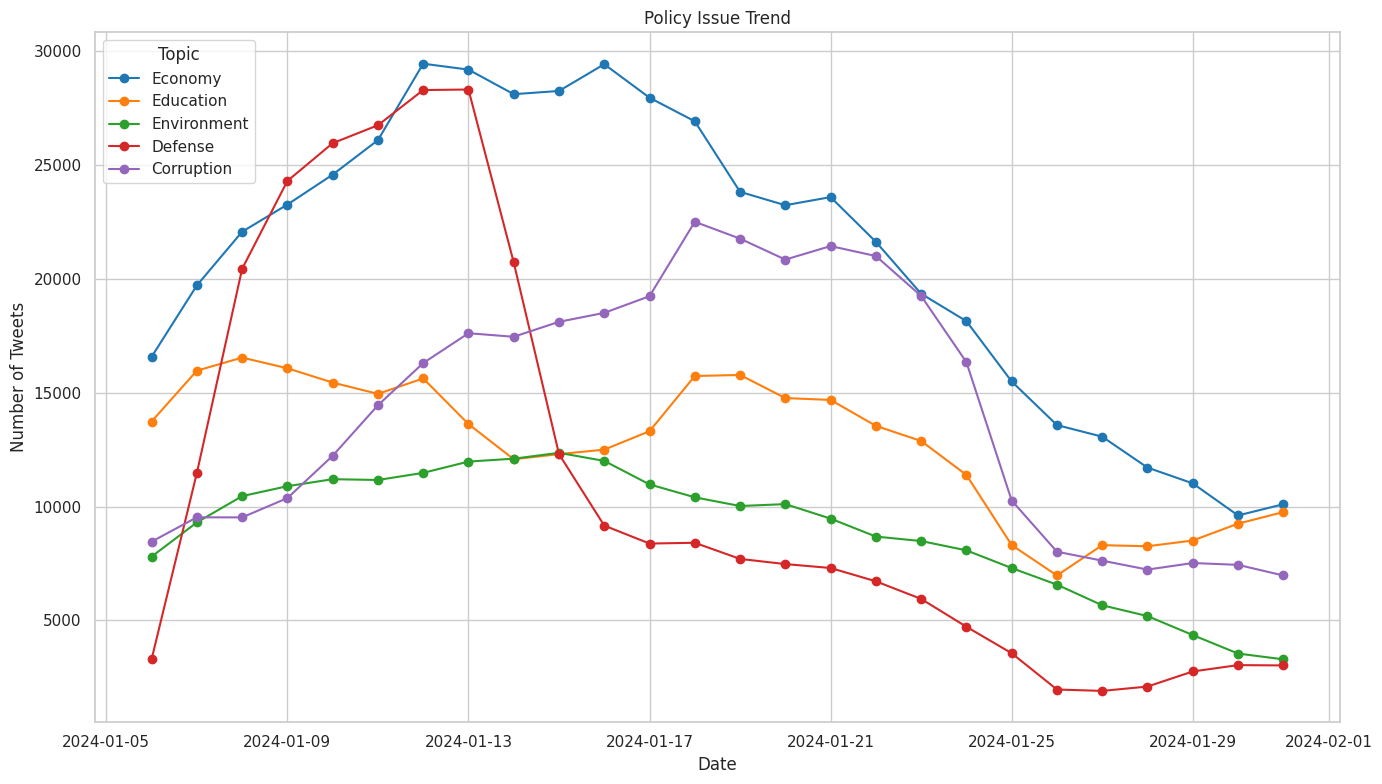

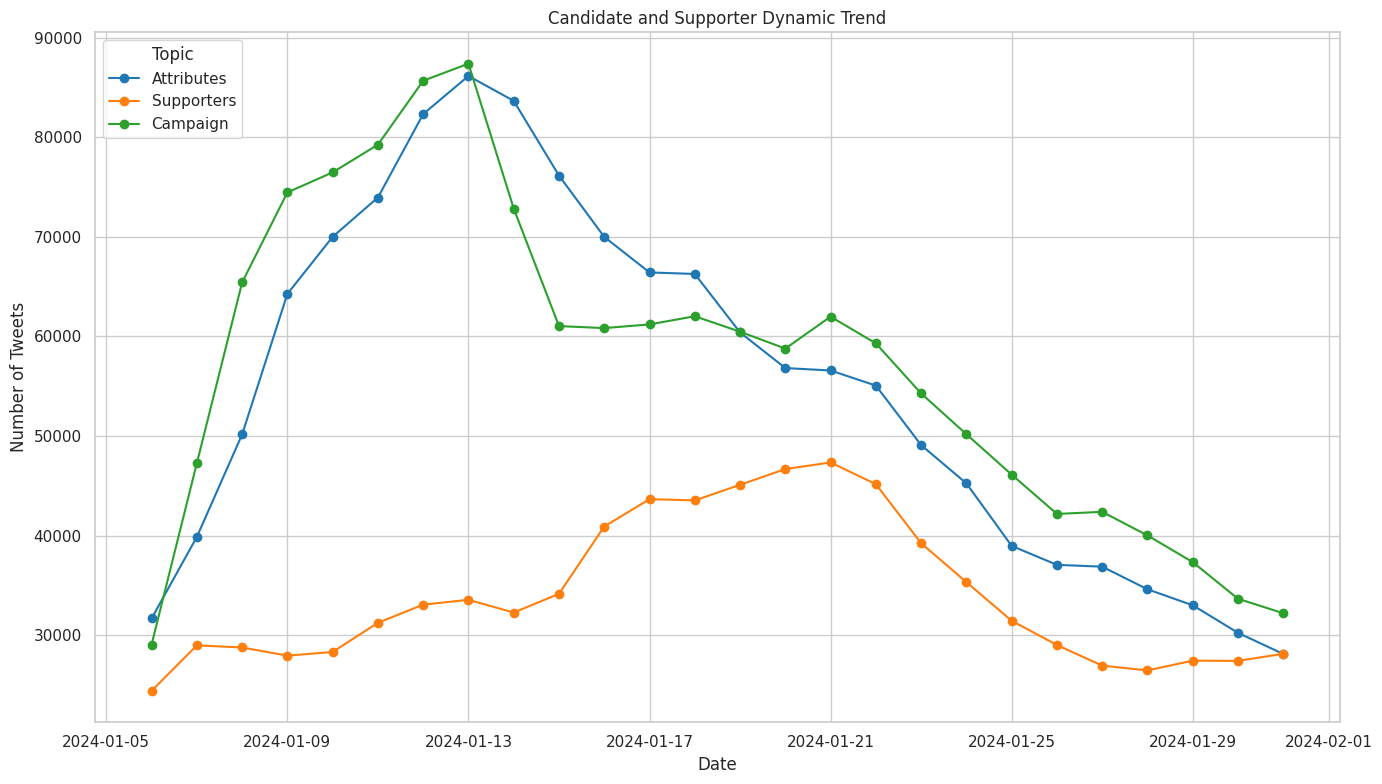

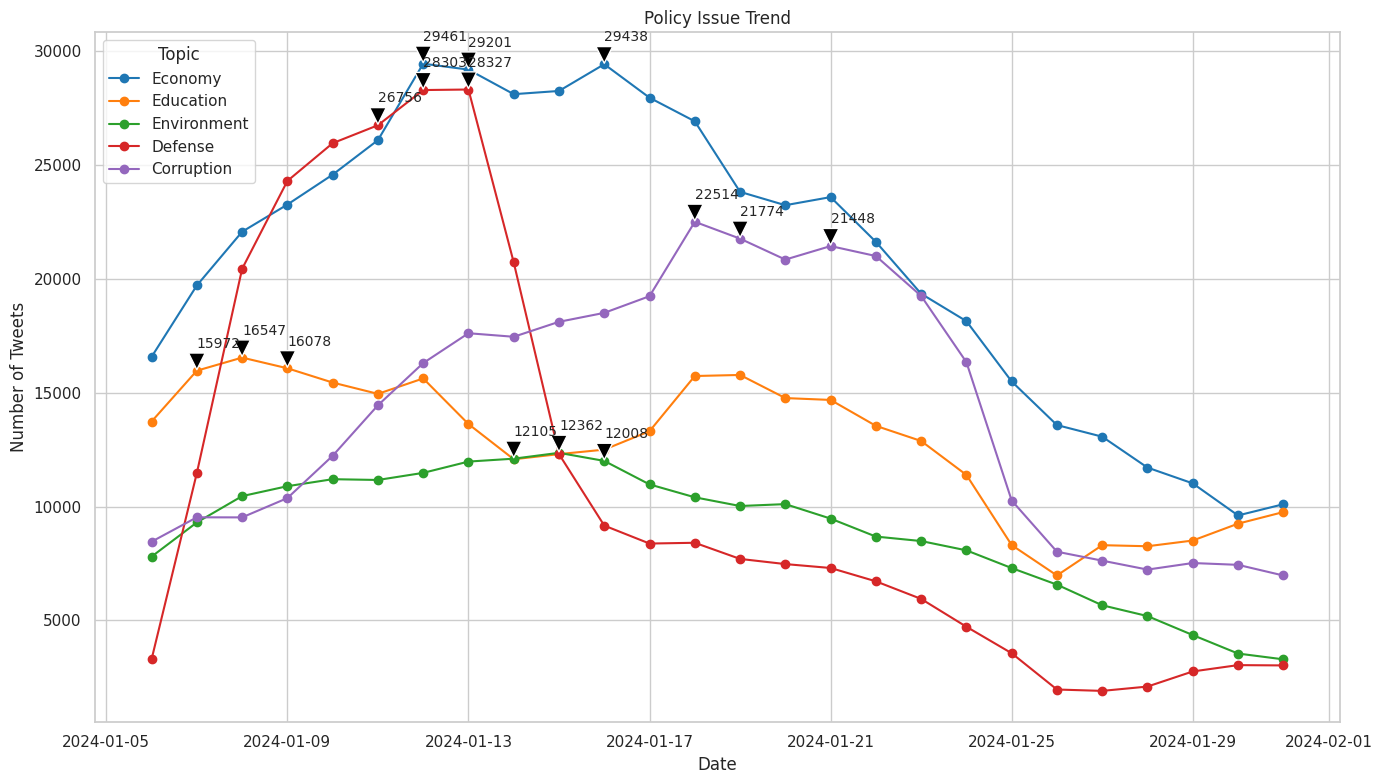

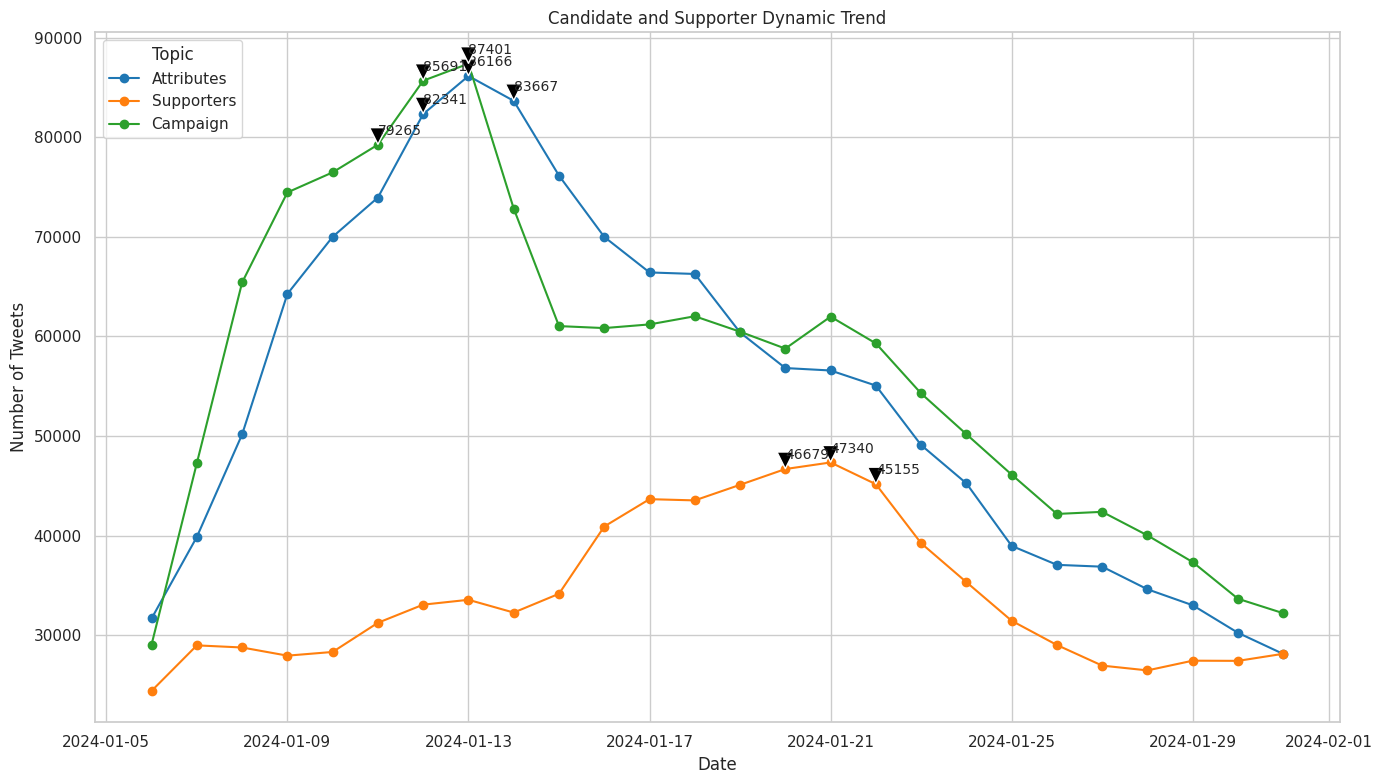

In [33]:
import seaborn as sns

# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("tab10")

def plot_trends_enhanced(data, topics, title):
    plt.figure(figsize=(14, 8))
    for idx, topic in enumerate(topics):
        topic_name = topic_names[topic]
        # Filter tweets for the current topic
        topic_tweets = data[data['predicted_topic'] == topic]
        # Resample by day and count tweets
        daily_tweets = topic_tweets.resample('D', on='created_at').size()
        # Apply rolling average to smooth the data
        daily_tweets = daily_tweets.rolling(window=7).mean()
        # Plotting tweet trends for each topic
        plt.plot(daily_tweets, label=topic_name, marker='o', linestyle='-', color=palette[idx])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Number of Tweets')
    plt.legend(title='Topic', loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot enhanced policy issue trends
plot_trends_enhanced(policy_topics, policy_issues, 'Policy Issue Trend')

# Plot enhanced candidate and supporter dynamic trends
plot_trends_enhanced(candidate_supporter_topics, candidate_supporter_dynamics, 'Candidate and Supporter Dynamic Trend')


def plot_trends_with_annotations(data, topics, title):
    plt.figure(figsize=(14, 8))
    for idx, topic in enumerate(topics):
        topic_name = topic_names[topic]
        # Filter tweets for the current topic
        topic_tweets = data[data['predicted_topic'] == topic]
        # Resample by day and count tweets
        daily_tweets = topic_tweets.resample('D', on='created_at').size()
        # Apply rolling average to smooth the data
        daily_tweets = daily_tweets.rolling(window=7).mean()
        # Plotting tweet trends for each topic
        plt.plot(daily_tweets, label=topic_name, marker='o', linestyle='-', color=palette[idx])
        # Annotate significant peaks
        peaks = daily_tweets.nlargest(3)  # Find top 3 peaks
        for date, value in peaks.items():
            plt.annotate(f'{value:.0f}', xy=(date, value), xytext=(date, value+1000),
                         arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Number of Tweets')
    plt.legend(title='Topic', loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot policy issue trends with annotations
plot_trends_with_annotations(policy_topics, policy_issues, 'Policy Issue Trend')

# Plot candidate and supporter dynamic trends with annotations
plot_trends_with_annotations(candidate_supporter_topics, candidate_supporter_dynamics, 'Candidate and Supporter Dynamic Trend')


# Candidate Trend

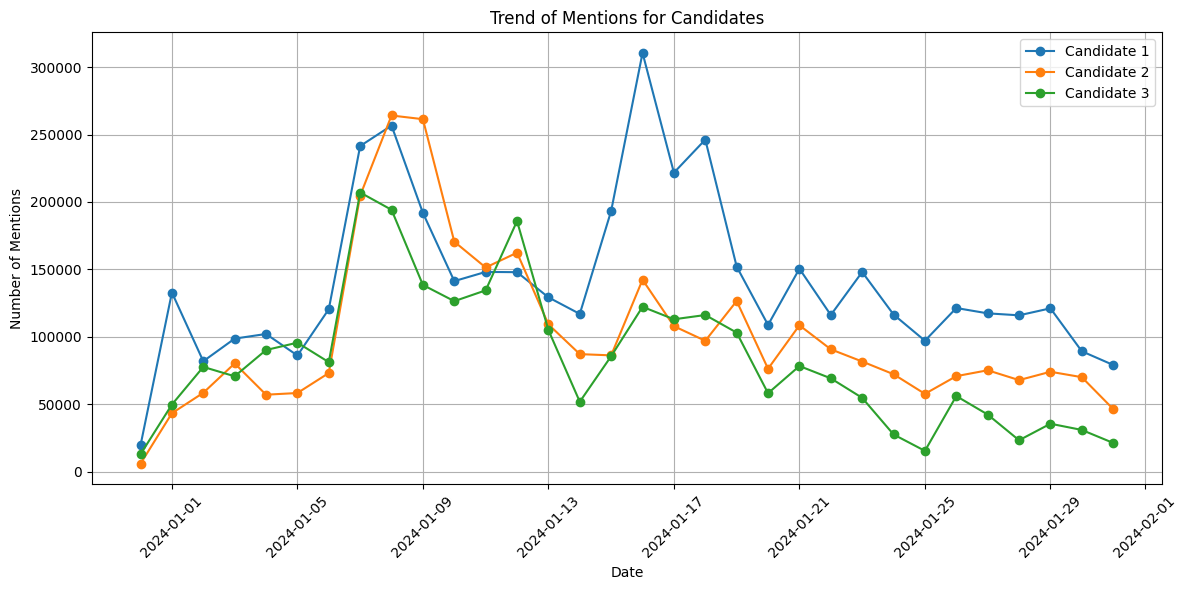

In [16]:
df['created_at'] = pd.to_datetime(df['created_at'])

# Group by date and sum the one-hot encoded columns
daily_counts = df.groupby(df['created_at'].dt.date)[['Candidate 1', 'Candidate 2', 'Candidate 3']].sum()

# Reset index to make date a regular column
daily_counts = daily_counts.reset_index()

# Plotting the trend of mentions for three candidates
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Plot for candidate 1
plt.plot(daily_counts['created_at'], daily_counts['Candidate 1'], marker='o', linestyle='-', label='Candidate 1')

# Plot for candidate 2
plt.plot(daily_counts['created_at'], daily_counts['Candidate 2'], marker='o', linestyle='-', label='Candidate 2')

# Plot for candidate 3
plt.plot(daily_counts['created_at'], daily_counts['Candidate 3'], marker='o', linestyle='-', label='Candidate 3')

plt.title('Trend of Mentions for Candidates')
plt.xlabel('Date')
plt.ylabel('Number of Mentions')
plt.grid(True)
plt.xticks(rotation=45) 
plt.legend()
plt.tight_layout()
plt.show()

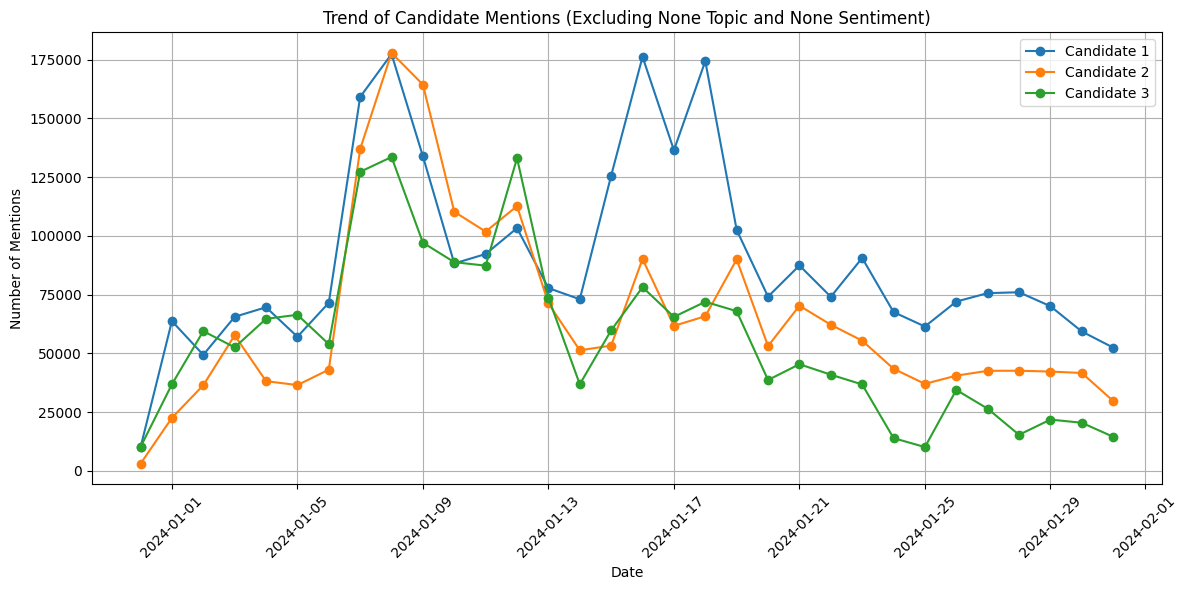

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame with tweets data
# Replace 'created_at', 'Candidate 1', 'Candidate 2', 'Candidate 3', 'predicted_topic', 'sentiment' with actual column names

# Convert 'created_at' to datetime format if needed
df['created_at'] = pd.to_datetime(df['created_at'])

# Filter tweets where predicted_topic != 0 and sentiment != 0
df_filtered = df[(df['predicted_topic'] != 0) & (df['predicted_sentiment'] != 0)]

# Group by date and sum the one-hot encoded columns for each candidate
daily_counts = df_filtered.groupby(df_filtered['created_at'].dt.date)[['Candidate 1', 'Candidate 2', 'Candidate 3']].sum()

# Reset index to make date a regular column
daily_counts = daily_counts.reset_index()

# Plotting the trend of candidate mentions where predicted_topic != 0 and sentiment != 0
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Plot for Candidate 1
plt.plot(daily_counts['created_at'], daily_counts['Candidate 1'], marker='o', linestyle='-', label='Candidate 1')

# Plot for Candidate 2
plt.plot(daily_counts['created_at'], daily_counts['Candidate 2'], marker='o', linestyle='-', label='Candidate 2')

# Plot for Candidate 3
plt.plot(daily_counts['created_at'], daily_counts['Candidate 3'], marker='o', linestyle='-', label='Candidate 3')

plt.title('Trend of Candidate Mentions (Excluding None Topic and None Sentiment)')
plt.xlabel('Date')
plt.ylabel('Number of Mentions')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()


# Trend Sentiment

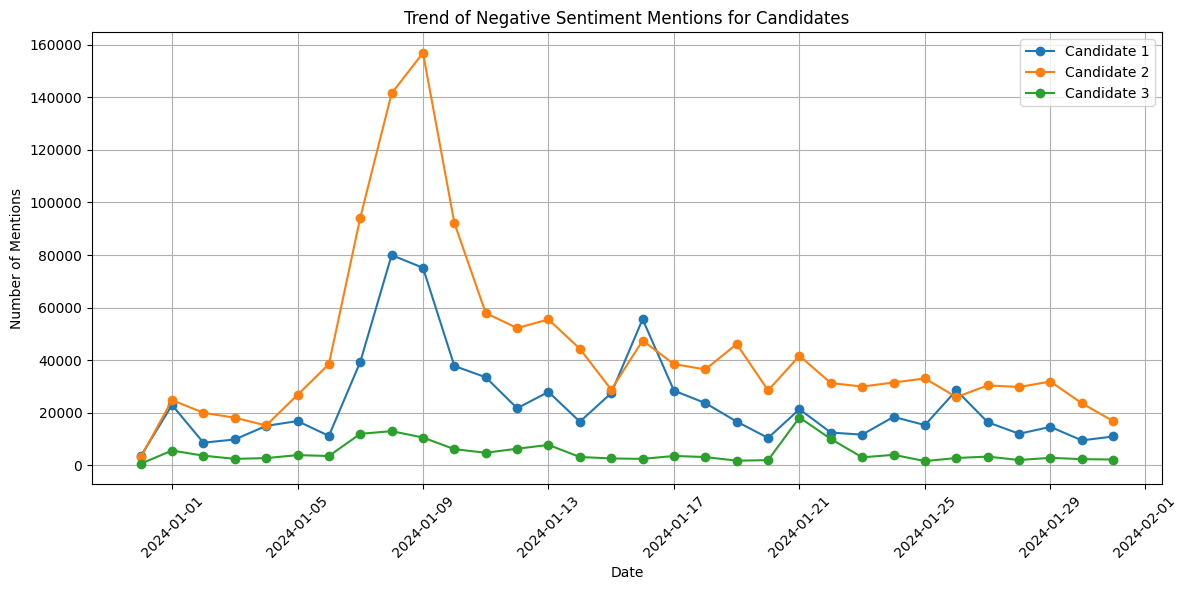

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame with tweets data
# Replace 'created_at', 'Candidate 1', 'Candidate 2', 'Candidate 3', 'predicted_sentiment' with actual column names

# Convert 'created_at' to datetime format if needed
df['created_at'] = pd.to_datetime(df['created_at'])

# Filter tweets with predicted_sentiment == 1 (negative sentiment)
df_negative = df[df['predicted_sentiment'] == 1]

# Group by date and sum the one-hot encoded columns for each candidate
daily_counts_negative = df_negative.groupby(df_negative['created_at'].dt.date)[['Candidate 1', 'Candidate 2', 'Candidate 3']].sum()

# Reset index to make date a regular column
daily_counts_negative = daily_counts_negative.reset_index()

# Plotting the trend of negative sentiment mentions for each candidate
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Plot for candidate 1
plt.plot(daily_counts_negative['created_at'], daily_counts_negative['Candidate 1'], marker='o', linestyle='-', label='Candidate 1')

# Plot for candidate 2
plt.plot(daily_counts_negative['created_at'], daily_counts_negative['Candidate 2'], marker='o', linestyle='-', label='Candidate 2')

# Plot for candidate 3
plt.plot(daily_counts_negative['created_at'], daily_counts_negative['Candidate 3'], marker='o', linestyle='-', label='Candidate 3')

plt.title('Trend of Negative Sentiment Mentions for Candidates')
plt.xlabel('Date')
plt.ylabel('Number of Mentions')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()


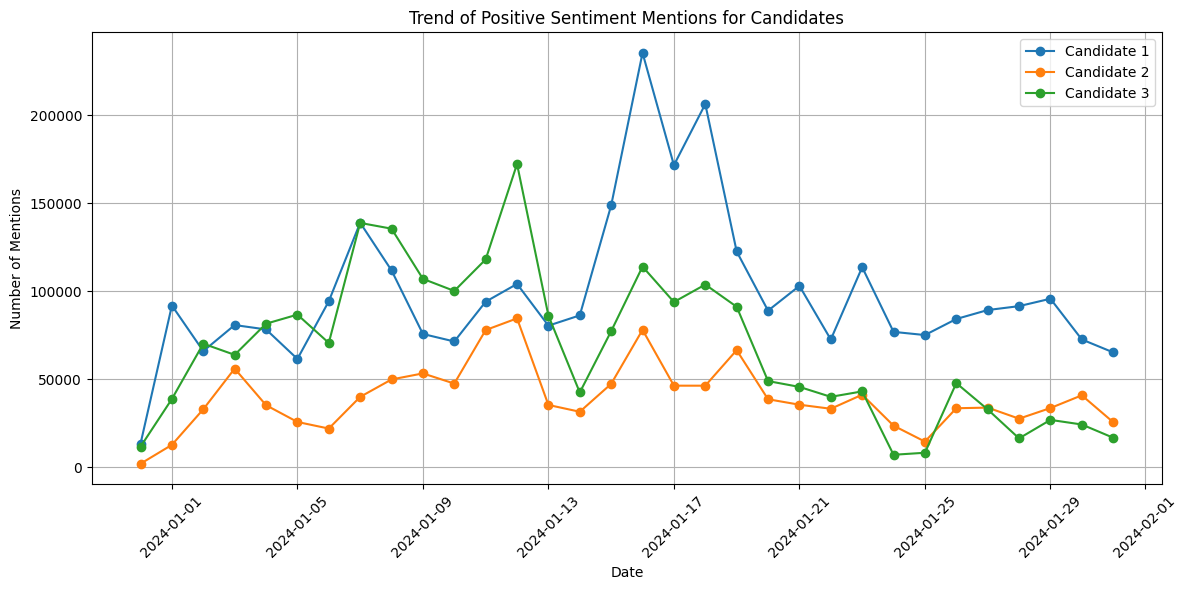

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame with tweets data
# Replace 'created_at', 'Candidate 1', 'Candidate 2', 'Candidate 3', 'predicted_sentiment' with actual column names

# Convert 'created_at' to datetime format if needed
df['created_at'] = pd.to_datetime(df['created_at'])

# Filter tweets with predicted_sentiment == 2 (positive sentiment)
df_positive = df[df['predicted_sentiment'] == 2]

# Group by date and sum the one-hot encoded columns for each candidate
daily_counts_positive = df_positive.groupby(df_positive['created_at'].dt.date)[['Candidate 1', 'Candidate 2', 'Candidate 3']].sum()

# Reset index to make date a regular column
daily_counts_positive = daily_counts_positive.reset_index()

# Plotting the trend of positive sentiment mentions for each candidate
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Plot for candidate 1
plt.plot(daily_counts_positive['created_at'], daily_counts_positive['Candidate 1'], marker='o', linestyle='-', label='Candidate 1')

# Plot for candidate 2
plt.plot(daily_counts_positive['created_at'], daily_counts_positive['Candidate 2'], marker='o', linestyle='-', label='Candidate 2')

# Plot for candidate 3
plt.plot(daily_counts_positive['created_at'], daily_counts_positive['Candidate 3'], marker='o', linestyle='-', label='Candidate 3')

plt.title('Trend of Positive Sentiment Mentions for Candidates')
plt.xlabel('Date')
plt.ylabel('Number of Mentions')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()


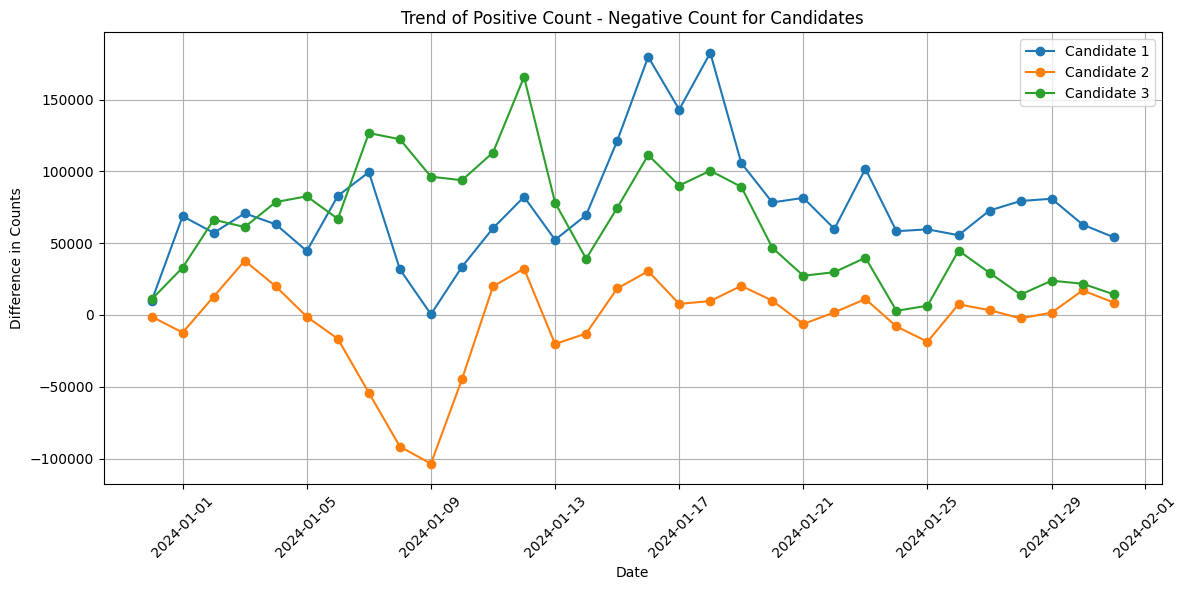

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame with tweets data
# Replace 'created_at', 'Candidate 1', 'Candidate 2', 'Candidate 3', 'predicted_sentiment' with actual column names

# Convert 'created_at' to datetime format if needed
df['created_at'] = pd.to_datetime(df['created_at'])

# Filter tweets with predicted_sentiment == 1 (negative sentiment)
df_negative = df[df['predicted_sentiment'] == 1]

# Group by date and sum the one-hot encoded columns for each candidate for negative sentiment
daily_counts_negative = df_negative.groupby(df_negative['created_at'].dt.date)[['Candidate 1', 'Candidate 2', 'Candidate 3']].sum()

# Reset index to make date a regular column
daily_counts_negative = daily_counts_negative.reset_index()

# Filter tweets with predicted_sentiment == 2 (positive sentiment)
df_positive = df[df['predicted_sentiment'] == 2]

# Group by date and sum the one-hot encoded columns for each candidate for positive sentiment
daily_counts_positive = df_positive.groupby(df_positive['created_at'].dt.date)[['Candidate 1', 'Candidate 2', 'Candidate 3']].sum()

# Reset index to make date a regular column
daily_counts_positive = daily_counts_positive.reset_index()

# Merge positive and negative counts on date
merged_counts = daily_counts_positive.merge(daily_counts_negative, on='created_at', suffixes=('_positive', '_negative'))

# Calculate the difference between positive and negative counts for each candidate
merged_counts['Candidate 1_diff'] = merged_counts['Candidate 1_positive'] - merged_counts['Candidate 1_negative']
merged_counts['Candidate 2_diff'] = merged_counts['Candidate 2_positive'] - merged_counts['Candidate 2_negative']
merged_counts['Candidate 3_diff'] = merged_counts['Candidate 3_positive'] - merged_counts['Candidate 3_negative']

# Plotting the trend of positive count minus negative count for each candidate
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Plot for Candidate 1
plt.plot(merged_counts['created_at'], merged_counts['Candidate 1_diff'], marker='o', linestyle='-', label='Candidate 1')

# Plot for Candidate 2
plt.plot(merged_counts['created_at'], merged_counts['Candidate 2_diff'], marker='o', linestyle='-', label='Candidate 2')

# Plot for Candidate 3
plt.plot(merged_counts['created_at'], merged_counts['Candidate 3_diff'], marker='o', linestyle='-', label='Candidate 3')

plt.title('Trend of Positive Count - Negative Count for Candidates')
plt.xlabel('Date')
plt.ylabel('Difference in Counts')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()


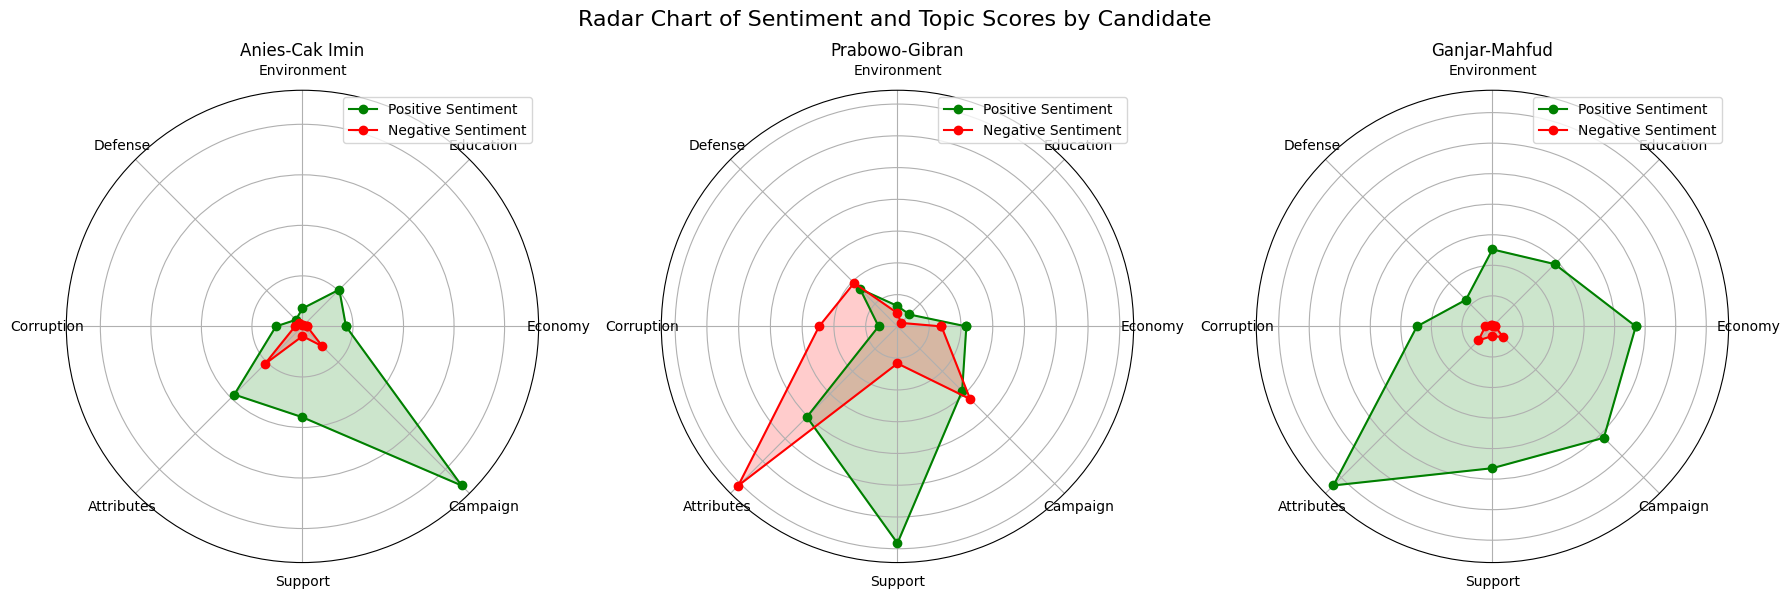

In [28]:
df_filtered = df[(df['predicted_topic'] != 0) & (df['predicted_sentiment'] != 0)]

# Count the negative (1) and positive (2) sentiment scores for each topic and candidate
sentiment_counts = {}
for candidate in ['Candidate 1', 'Candidate 2', 'Candidate 3']:
    sentiment_counts[candidate] = df_filtered.groupby(['predicted_topic', 'predicted_sentiment'])[candidate].sum().unstack(fill_value=0)

# Define the topics and their short labels
topics = [
    "Economy",
    "Education",
    "Environment",
    "Defense",
    "Corruption",
    "Attributes",
    "Support",
    "Campaign"
]

num_topics = len(topics)

# Ensure all topics are represented in the scores
for candidate, counts in sentiment_counts.items():
    for sentiment in [1, 2]:
        if sentiment not in counts.columns:
            counts[sentiment] = 0
    counts = counts.reindex(range(1, num_topics+1), fill_value=0)
    sentiment_counts[candidate] = counts

# Prepare data for plotting
angles = np.linspace(0, 2 * np.pi, num_topics, endpoint=False).tolist()
angles += angles[:1]

# Plot radar chart for each candidate
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(polar=True))
fig.suptitle('Radar Chart of Sentiment and Topic Scores by Candidate', fontsize=16)

candidate_names = ['Anies-Cak Imin', 'Prabowo-Gibran', 'Ganjar-Mahfud']

for i, candidate in enumerate(['Candidate 1', 'Candidate 2', 'Candidate 3']):
    scores = sentiment_counts[candidate]
    
    # Positive sentiment scores
    positive_scores = scores[2].tolist()
    positive_scores += positive_scores[:1]
    
    # Negative sentiment scores
    negative_scores = scores[1].tolist()
    negative_scores += negative_scores[:1]
    
    # Plot radar chart
    axs[i].plot(angles, positive_scores, marker='o', linestyle='-', label='Positive Sentiment', color='g')
    axs[i].fill(angles, positive_scores, color='g', alpha=0.2)
    
    axs[i].plot(angles, negative_scores, marker='o', linestyle='-', label='Negative Sentiment', color='r')
    axs[i].fill(angles, negative_scores, color='r', alpha=0.2)
    
    # Set title and labels
    axs[i].set_title(candidate_names[i])
    axs[i].set_yticklabels([])
    axs[i].set_xticks(angles[:-1])
    axs[i].set_xticklabels(topics)
    axs[i].legend(loc='upper right')

plt.tight_layout()
plt.show()

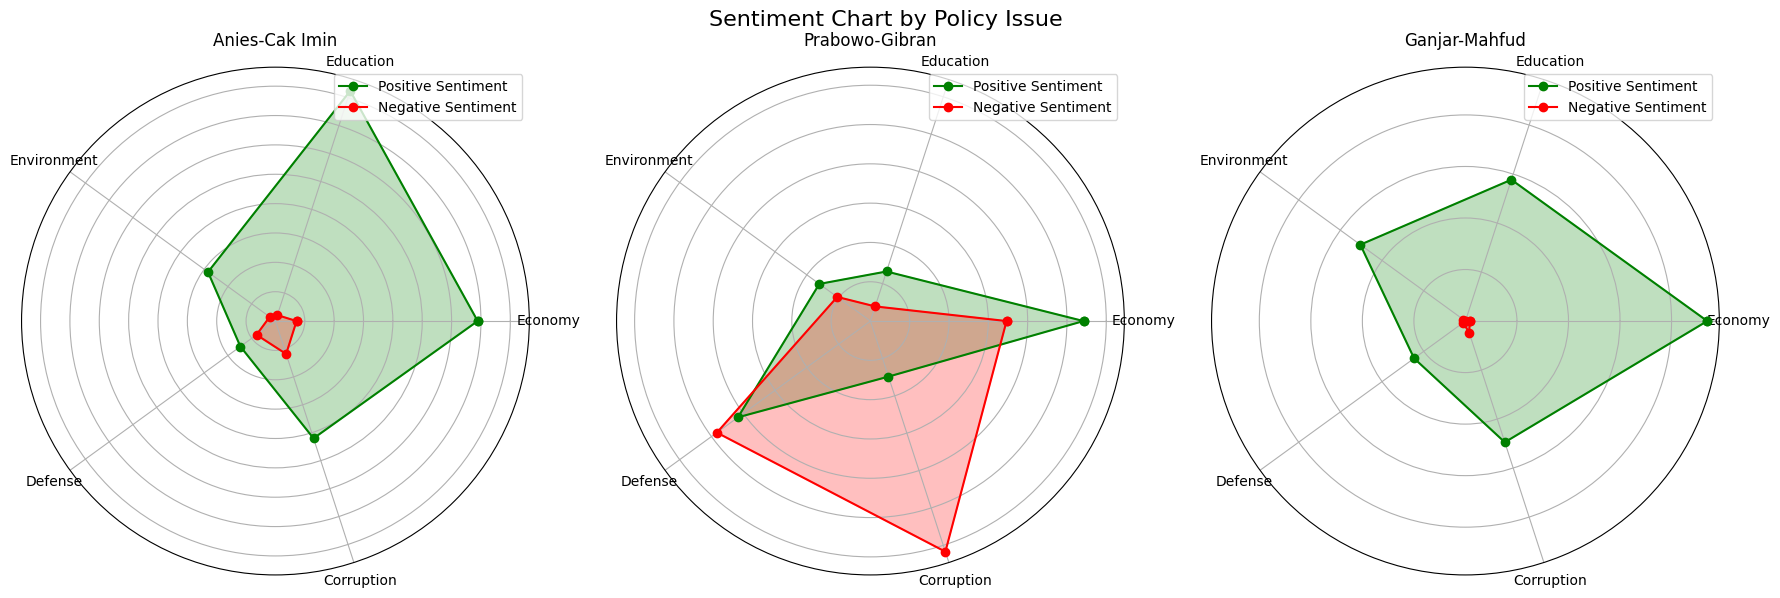

In [30]:
# Filter out rows where predicted_topic == 0 or predicted_sentiment == 0
df_filtered = df[(df['predicted_topic'] != 0) & (df['predicted_sentiment'] != 0)]

# Keep only topics 1, 2, 3, 4, 5
df_filtered = df_filtered[df_filtered['predicted_topic'].isin([1, 2, 3, 4, 5])]

# Count the negative (1) and positive (2) sentiment scores for each topic and candidate
sentiment_counts = {}
for candidate in ['Candidate 1', 'Candidate 2', 'Candidate 3']:
    sentiment_counts[candidate] = df_filtered.groupby(['predicted_topic', 'predicted_sentiment'])[candidate].sum().unstack(fill_value=0)

# Define the topics and their short labels
topics = [
    "Economy",
    "Education",
    "Environment",
    "Defense",
    "Corruption"
]

num_topics = len(topics)

# Ensure all topics are represented in the scores
for candidate, counts in sentiment_counts.items():
    for sentiment in [1, 2]:
        if sentiment not in counts.columns:
            counts[sentiment] = 0
    counts = counts.reindex(range(1, num_topics+1), fill_value=0)
    sentiment_counts[candidate] = counts

# Prepare data for plotting
angles = np.linspace(0, 2 * np.pi, num_topics, endpoint=False).tolist()
angles += angles[:1]

# Plot radar chart for each candidate
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(polar=True))
fig.suptitle('Sentiment Chart by Policy Issue', fontsize=16)

candidate_names = ['Anies-Cak Imin', 'Prabowo-Gibran', 'Ganjar-Mahfud']

for i, candidate in enumerate(['Candidate 1', 'Candidate 2', 'Candidate 3']):
    scores = sentiment_counts[candidate]
    
    # Positive sentiment scores
    positive_scores = scores[2].tolist()
    positive_scores += positive_scores[:1]
    
    # Negative sentiment scores
    negative_scores = scores[1].tolist()
    negative_scores += negative_scores[:1]
    
    # Plot radar chart
    axs[i].plot(angles, positive_scores, marker='o', linestyle='-', label='Positive Sentiment', color='g')
    axs[i].fill(angles, positive_scores, color='g', alpha=0.25)
    
    axs[i].plot(angles, negative_scores, marker='o', linestyle='-', label='Negative Sentiment', color='r')
    axs[i].fill(angles, negative_scores, color='r', alpha=0.25)
    
    # Set title and labels
    axs[i].set_title(candidate_names[i])
    axs[i].set_yticklabels([])
    axs[i].set_xticks(angles[:-1])
    axs[i].set_xticklabels(topics)
    axs[i].legend(loc='upper right')

plt.tight_layout()
plt.show()

In [37]:
# Count the frequency of each reply token
reply_token_counts = df['reply_tokens'].value_counts().reset_index()
reply_token_counts.columns = ['reply_token', 'count']

In [42]:
df.columns

Index(['index_x', 'created_at', 'username', 'tcode', 'num_retweets', 'type',
       'following', 'followers', 'sts_cnt', 'loc', 'lst_cnt', 'content',
       'lang', 'reply_tokens', 'mentions', 'hashtags', 'index_y',
       'predicted_candidate_mentions', 'predicted_sentiment',
       'predicted_topic', 'None', 'Candidate 1', 'Candidate 2', 'Candidate 3'],
      dtype='object')

In [38]:
reply_token_counts.head(50)

,reply_token,count
0,[re mdy_asmara1701],318186
1,[re yurissa_samosir],225702
2,[re ekowboy2],153823
3,[re tempodotco],139373
4,[re bangpino__],112101
5,[re kumparan],98310
6,[re abu_waras],90292
7,[re tvonenews],89889
8,[re aniesbubble],84576
9,[re bospurwa],77089


In [ ]:
,'predicted_sentiment','predicted_topic','Candidate 1','Candidate 2','Candidate 3'